**Linear Regression Implementation**

Every machine learning endeavor typically commences with a structured approach:


1. **Data Inspection**: This step involves getting an initial grasp of the data—its format, size, and attributes.
2.   **Data Visualization**: Visualizing the data aids in understanding patterns, distributions, and potential correlations.
3. **Data Regularization**: This involves preprocessing steps like cleaning, handling missing values, and normalization to prepare the data for modeling
4. **Model Implementation**: After data preparation, the model, in this case, Linear Regression, is created, trained, and evaluated.


For this specific project, our dataset comprises real estate valuations from New Taipei City, Taiwan. To embark on this journey, we'll initially load the dataset into a DataFrame and thoroughly examine its contents to gain insights and plan our subsequent steps.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# Load the dataset
data_df = pd.read_csv("/content/sample_data/Real estate.csv")

# Perform an initial inspection of the data

# Display the shape of the dataset
print("Shape of the dataset is: ", data_df.shape)

# Display the first 10 rows of the dataset
data_df[:10]


Shape of the dataset is:  (414, 8)


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


**Data Regularization**

Regularizing data in machine learning is vital to ensure that features with varying scales don't dominate the learning process. For instance, when considering features like the number of bedrooms and total square footage, their magnitudes might greatly differ. Regularization, often done through techniques like z-score normalization, standardizes these features to have similar scales, preventing biases due to varying magnitudes. In the provided code, the data is split into features and outputs, shuffled, and divided into training and test sets.

Then, using the equation:

$$z= (sample−μ)/σ$$

​the code standardizes the features by centering them around the mean and scaling them by the standard deviation, enhancing model convergence and stability while ensuring each feature contributes meaningfully to the learning process.


In [ ]:
# Data preprocessing for Linear Regression

# Regularization: Standardizing features using z-score normalization (z = (sample - mu) / sigma)

# Converting Pandas DataFrame to a NumPy array
data = data_df.to_numpy()

# Excluding the 'No' column as it's not a real datapoint, contains house numbers
data = data[:, 1:]

# Regularizing features, not the labels (last column)
x_data = data[:, :-1]

# Calculating the mean (average) of each feature
mu = x_data.sum(axis=0) / data.shape[0]

# Calculating the standard deviation of each feature
sigma = np.std(x_data, axis=0)

# Regularizing the features using z-score normalization
r_data = (x_data - mu) / sigma

# Appending a column of 1s for the bias term (intercept)
r_data = np.c_[np.ones(r_data.shape[0]), r_data]


**Splitting the Data**

In machine learning, splitting data is a fundamental practice crucial for model training and evaluation. This process involves dividing a dataset into distinct subsets, typically a training set and a test set. The training set is utilized to teach the model patterns and relationships within the data, allowing it to learn associations between features and their corresponding labels or outcomes.

Here, we will partition 2/3rds of the data to train on, and 1/3 of the data to test and verify on.

In [ ]:
# Separating data into features (X) and labels (y)
y = data[:, -1]  # Labels are taken from the last column of the dataset
X = r_data  # Features after regularization

# Splitting the dataset into training and test sets
# Shuffle the data for improved performance and reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, shuffle=True, random_state=42
)


Training the model involves employing two distinct methods: gradient descent and the normal equation.

**Gradient descent** - an iterative algorithm, starts with random weights for the feature vector. It computes predictions and errors iteratively, adjusting weights with each step based on the calculated gradients multiplied by a learning rate, preventing overshooting or undershooting the minimum. Finding the right learning rate is crucial: too low, and convergence to the minimum might be slow; too high, and it might overshoot.

**Normal equation** - Though more computationally efficient for small datasets, directly computes the optimal weights by minimizing the convex equation regardless of the number of features, making it faster than gradient descent for datasets with numerous features. Comparing the results from both methods allows us to gauge their performance.

Text(150, 30, 'MSE: \nGradient Descent: 71.49\nNormal Eq: 71.49')

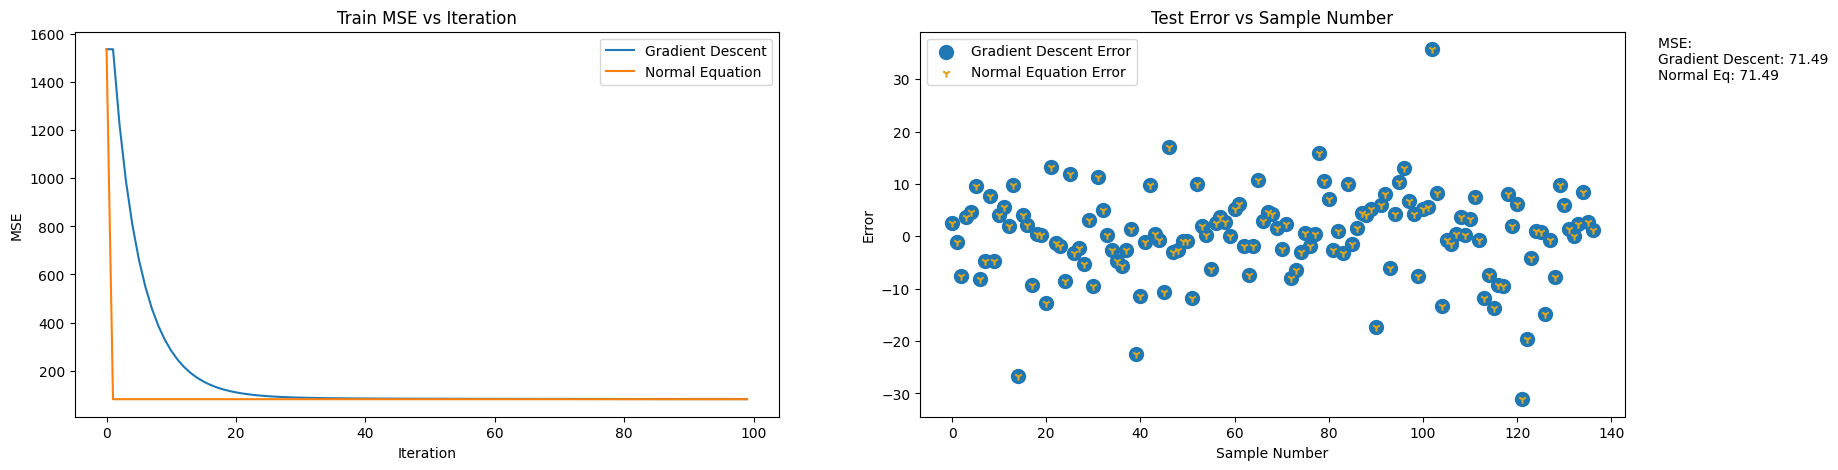

In [5]:
alpha = .002
gMSE_all = []
nMSE_all = []
i_all = []

# initialize weights
theta = np.random.randn(X_train.shape[1])*np.sqrt(2)
y_hat = X_train @ theta
gMSE = (1/X_train.shape[0])*sum((y_hat - y_train)**2)
nMSE = (1/X_train.shape[0])*sum((y_hat - y_train)**2)
gMSE_all.append(gMSE)
nMSE_all.append(nMSE)

# Save initial errors


for i in range(1000):
    # make prediction
    y_hat = X_train @ theta

    # calculate cost
    gMSE = (1/X_train.shape[0])*sum((y_hat - y_train)**2)
    # collect data
    gMSE_all.append(gMSE)
    i_all.append(i)

    # Gradient Descent
    delta = (2/X_train.shape[0])*(X_train.T @ (y_hat - y_train))

    # update
    theta = theta - .05*delta


    # theta_hat does not need to be here, used to show instant best calculation on graph
    theta_hat = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
    y_hat = X_train @ theta_hat
    nMSE = (1/X_train.shape[0])*sum((y_hat - y_train)**2)
    nMSE_all.append(nMSE)
    # Normal Equation
theta_hat = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)


gy_hat = X_test @ theta
ny_hat = X_test @ theta_hat

# calculate average squared error
gMSE = (1/X_test.shape[0])*sum((gy_hat - y_test)**2)
nMSE = (1/X_test.shape[0])*sum((ny_hat - y_test)**2)

fig, ax = plt.subplots(1,2, figsize = (20,5))

# Plot the first 100 to highlight curve
ax[0].plot(i_all[:100], gMSE_all[:100], label = "Gradient Descent")
ax[0].plot(i_all[:100], nMSE_all[:100], label = "Normal Equation")
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("MSE")
ax[0].set_title("Train MSE vs Iteration")
ax[0].legend()

#predict on test data
ax[1].scatter(range(X_test.shape[0]), gy_hat - y_test, label = "Gradient Descent Error", s = 100)
ax[1].set_xlabel("Sample Number")
ax[1].set_ylabel("Error")
ax[1].set_title("Test Error vs Sample Number")
ax[1].scatter(range(X_test.shape[0]), ny_hat - y_test, label = "Normal Equation Error", c = 'goldenrod', marker = '1')
ax[1].legend()

text = "MSE: \n" + "Gradient Descent: " + str(round(gMSE,2)) + "\n" + "Normal Eq: " + str(round(nMSE,2))
ax[1].text(150,30, text)


**Results Visualization**

Now that our model has been trained, we van see how well our predictions align with the actual results of the test sets. We can deconstruct the feature vector and plot the input featurs vs the predictions and the actual results so see how well we perform.

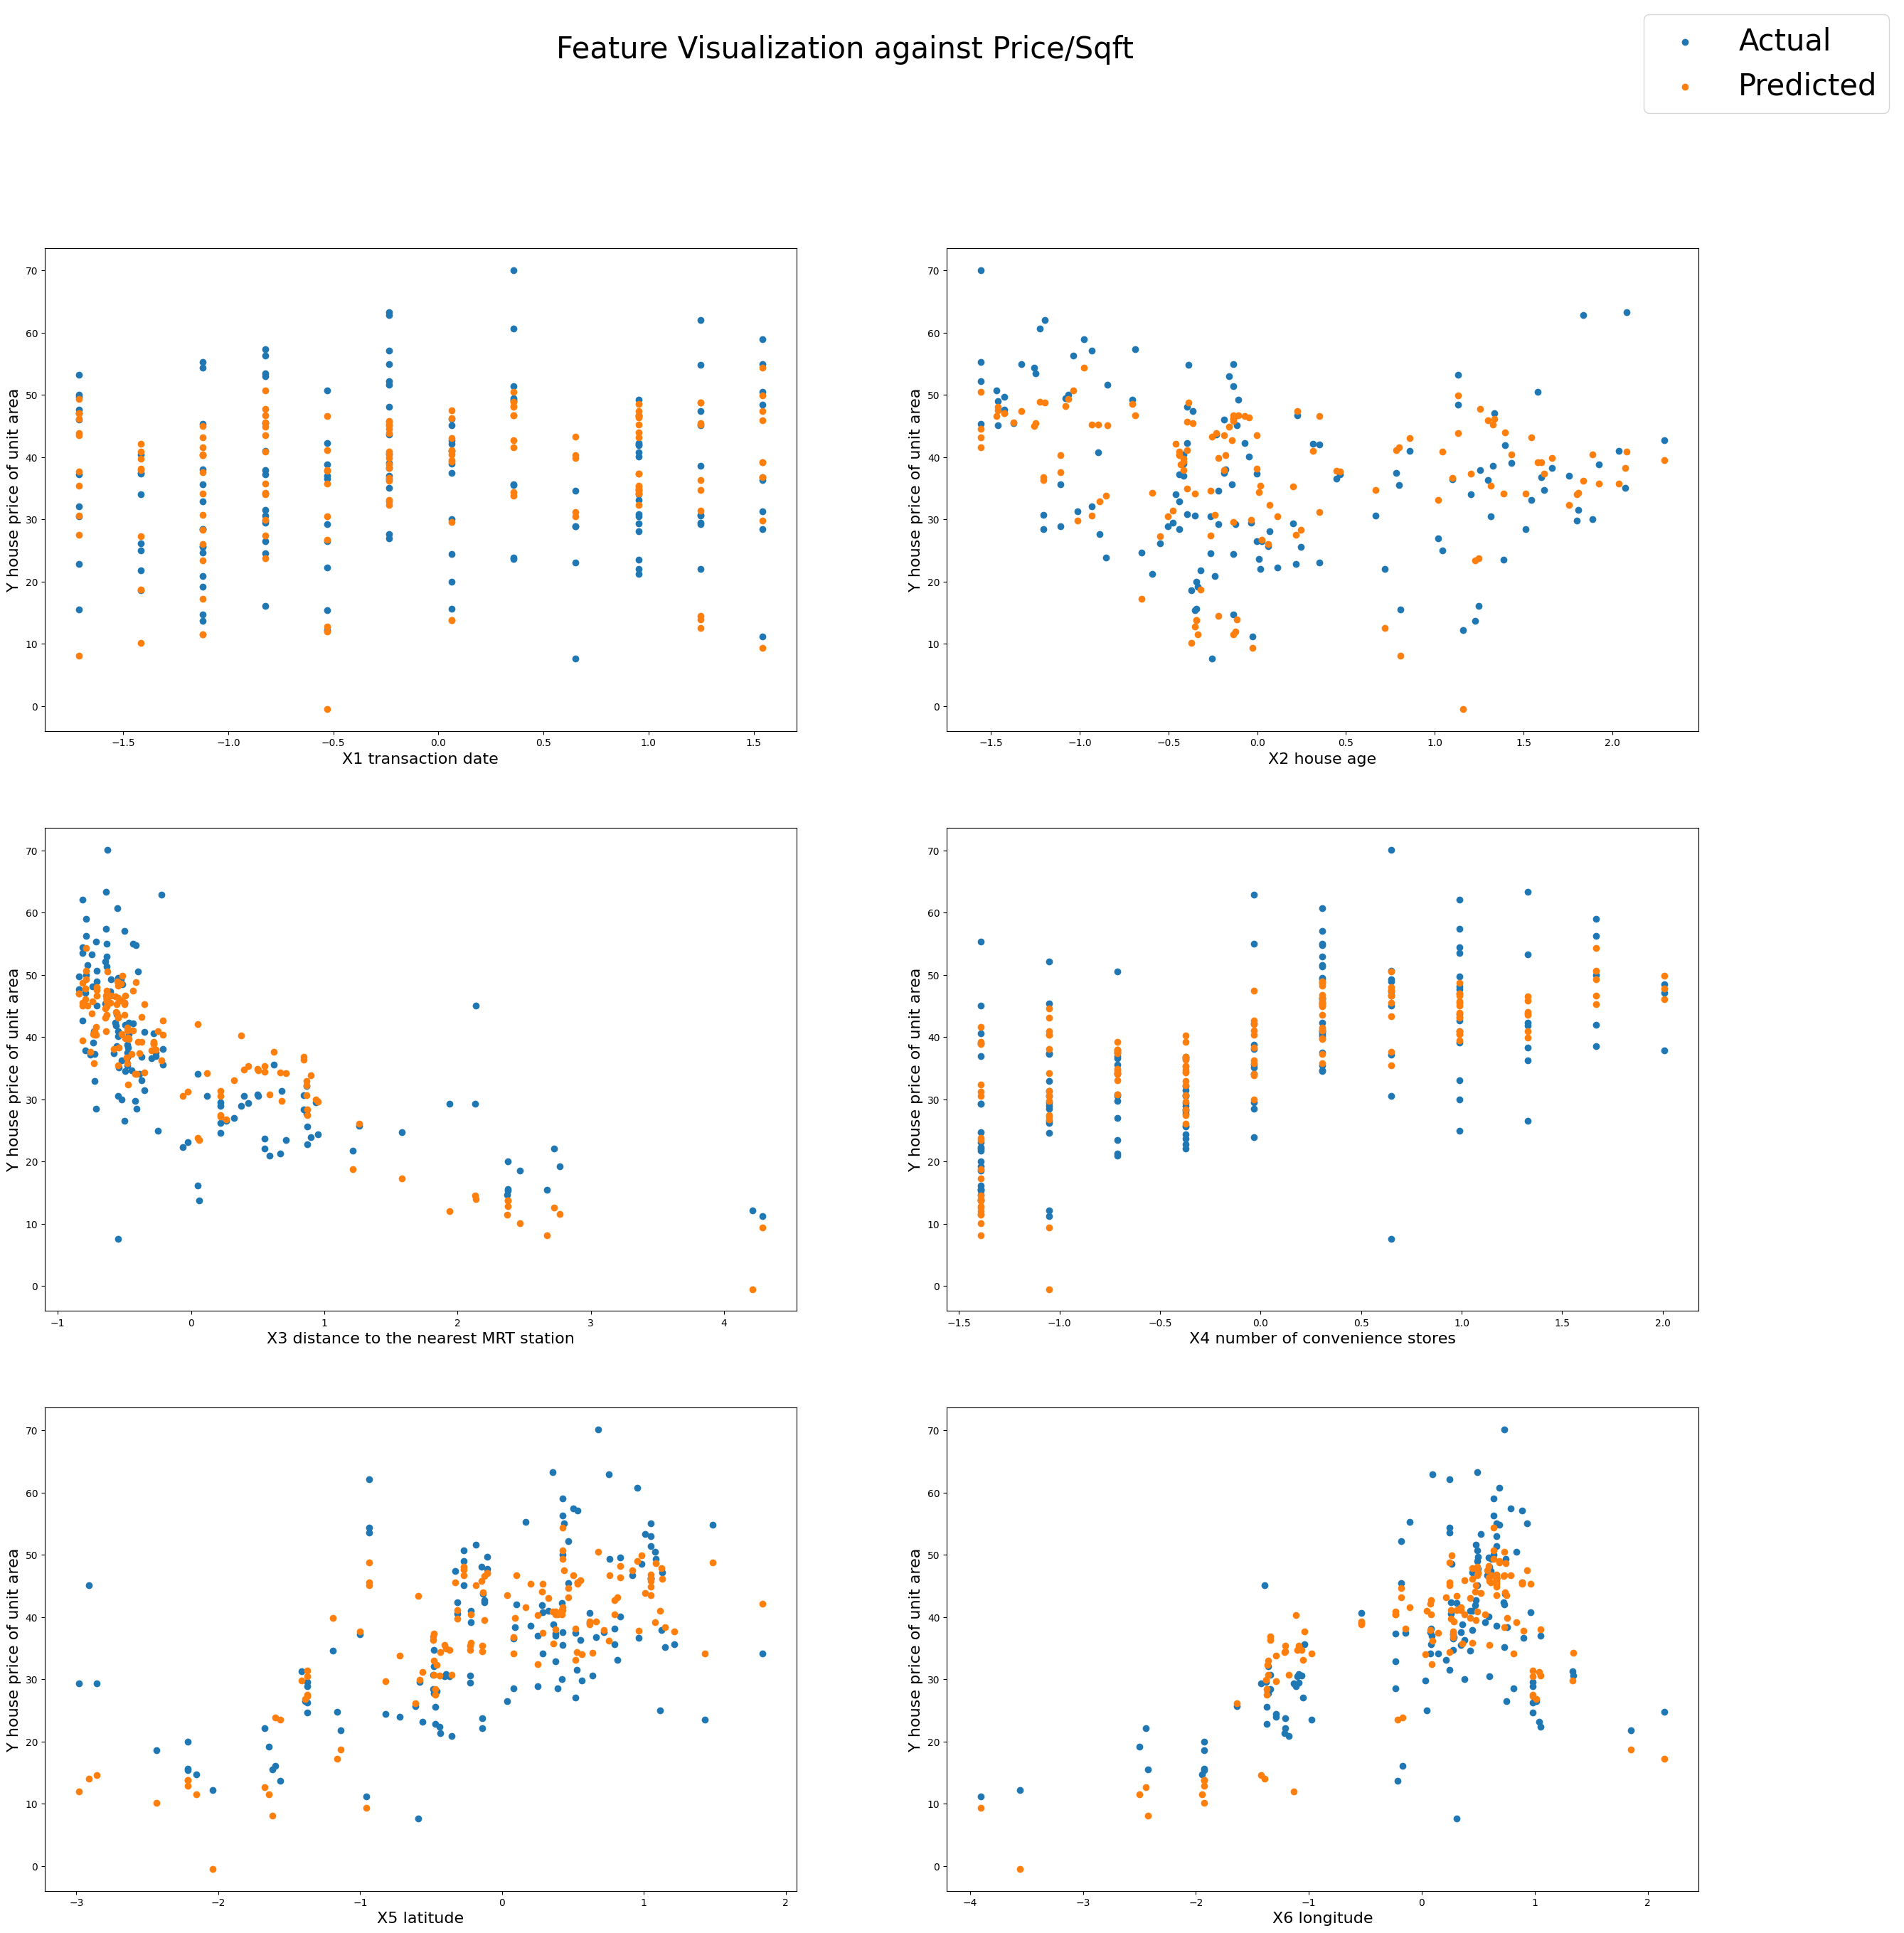

In [6]:
# Data Visualization to Identify Patterns
fig, axs = plt.subplots(3, 2)  # Creating subplots for visualization

# Adjusting the figure size for better visibility
fig.set_size_inches(30, 30)

# Adding a title to the entire figure
fig.suptitle("Feature Visualization against Price/Sqft", fontsize=30)

# Selecting the target label for comparison
label = y_test

# Initialize subplot indices
u = 0
v = 0

# Plotting each feature against the price/sqft
for i in range(1, X_test.shape[1]):
    # Scatter plot of features against the label and predicted values
    axs[v, u].scatter(X_test[:, i], label)  # Actual label
    axs[v, u].scatter(X_test[:, i], ny_hat)  # Predicted label
    axs[v, u].set_xlabel(data_df.columns[i], fontsize=16)
    axs[v, u].set_ylabel(data_df.columns[-1], fontsize=16)

    # Managing subplot indices
    u += 1
    if u > 1:
        u = 0
        v += 1
    if v > 2:
        v = 0

# Adding a legend for the plotted data
fig.legend(["Actual", "Predicted"], fontsize=30)


**Error Analysis**
There are several ways to judge the efficacy of reggression algorthims. Three of the most prominent are Mean Squared Error, Mean Absolute Error, and $𝑹^2$
 Error.

**Mean Squared Error**
$MAE=1/n Σ{_i=1}^n(\y

**Mean Absolute Error**

**$R^2$ Error**


In [7]:
# Calculating Mean Squared Error (MSE)
y_hat = X_test @ theta_hat
MSE = (1 / X_test.shape[0]) * sum((y_hat - y_test) ** 2)
print(f"Mean Squared Error: {np.round(MSE, 2)}")

# Calculating Mean Absolute Error (MAE)
MAE = (1 / X_test.shape[0]) * sum(np.abs((y_hat - y_test)))
print(f"Mean Absolute Error: {np.round(MAE, 2)}")

# Calculating R-squared (r^2)
R2 = sk.metrics.r2_score(y_test, y_hat)
print(f"R-square: {np.round(R2, 2)}")


Mean Squared Error: 71.49
Mean Absolute Error: 6.09
R-square: 0.55
